In [0]:
# import libraries 

import tensorflow as tf
from tensorflow import keras

import numpy as np

In [3]:
# dataset

boston_housing = tf.keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [0]:
# shuffling

order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [9]:
# view data

print("Training data : ", train_data.shape)
print("Test data : ", test_data.shape)


Training data :  (404, 13)
Test data :  (102, 13)


In [10]:
train_data[0]

array([2.81838e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.32000e-01,
       5.76200e+00, 4.03000e+01, 4.09830e+00, 2.40000e+01, 6.66000e+02,
       2.02000e+01, 3.92920e+02, 1.04200e+01])

In [12]:
test_labels[0:3]    # prices

array([ 7.2, 18.8, 19. ])

In [13]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42
1,5.29305,0.0,18.10,0.0,0.700,6.051,82.5,2.1678,24.0,666.0,20.2,378.38,18.76
2,0.09065,20.0,6.96,1.0,0.464,5.920,61.5,3.9175,3.0,223.0,18.6,391.34,13.65
3,0.61470,0.0,6.20,0.0,0.507,6.618,80.8,3.2721,8.0,307.0,17.4,396.90,7.60
4,1.00245,0.0,8.14,0.0,0.538,6.674,87.3,4.2390,4.0,307.0,21.0,380.23,11.98


In [0]:
# normalise the data

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [15]:
train_data[0]

array([-0.10041189, -0.48361547,  1.0283258 , -0.25683275, -0.21644393,
       -0.71247783, -1.02883173,  0.17656908,  1.67588577,  1.5652875 ,
        0.78447637,  0.40573428, -0.32030879])

In [0]:
# creating the model

def build_model():
  model = keras.Sequential([
      keras.layers.Dense(64, activation = tf.nn.relu, 
                         input_shape=(train_data.shape[1],)),
      keras.layers.Dense(64, activation = tf.nn.relu),
      keras.layers.Dense(1)
  ])
  
  optimizer = tf.train.RMSPropOptimizer(0.001)  # learning rate=0.001

  model.compile(loss='mse',      # mean square error
                optimizer = optimizer,
                metrics=['mae'])      # mean absolute error
  
  return model

In [19]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Display training progress by printing a single dot for each completed epoch

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500


In [21]:
# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

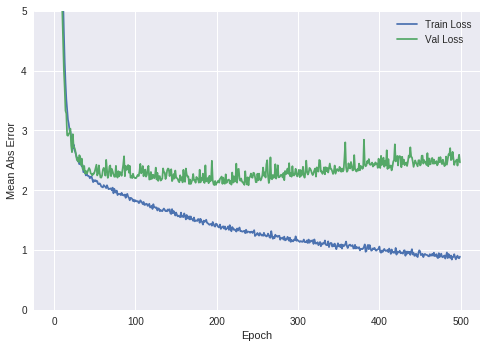

In [23]:
# its good to visualize the model with the help of graphs, so that we know how long 
# to train the model before the data actually stops making progress

import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
          label = 'Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
          label = 'Val Loss')
  plt.legend()
  plt.ylim([0, 5])
  
plot_history(history)


....................................................................................................
........

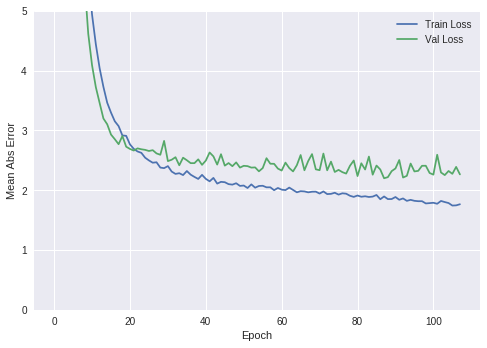

In [24]:
# rebuid the model
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS, 
                    validation_split=0.2, verbose=0, 
                   callbacks=[early_stop, PrintDot()])

plot_history(history)

In [25]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error : ", mae*1000)

Testing set Mean Abs Error :  2843.892499512317


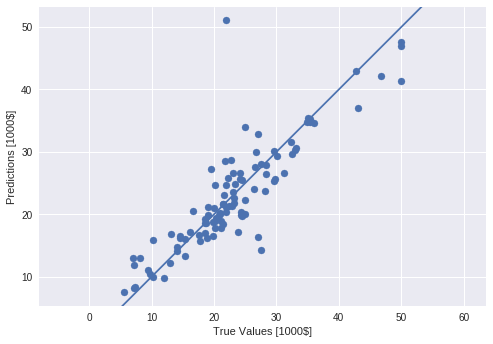

In [35]:
# test predictions

test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

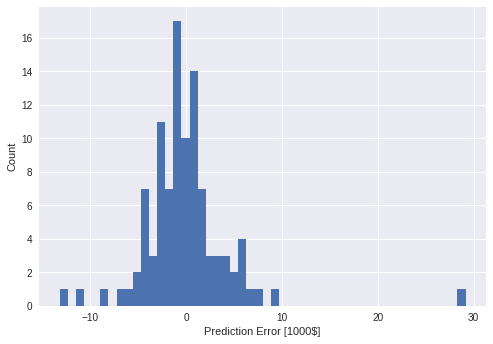

In [27]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")